### 4개의 입력데이터 연산 (A1-A2+A3-A4) 예측하는 Linear Regression 예제

In [5]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# 수치미분 코드
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [6]:
try:
    loaded_data = np.loadtxt('./(200302)sps.csv', delimiter=',', dtype=np.float32)
    
    x_data = loaded_data[ :, 1:]
    t_data = loaded_data[ :, [0]]

    # 데이터 차원 및 shape 확인
    print("loaded_data.ndim = ", loaded_data.ndim, ", loaded_data.shape = ", loaded_data.shape)
    print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
    print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape) 
    
except FileNotFoundError as err:
    print(str(err))
except Exception as err:
    print(str(err))

loaded_data.ndim =  2 , loaded_data.shape =  (50, 5)
x_data.ndim =  2 , x_data.shape =  (50, 4)
t_data.ndim =  2 , t_data.shape =  (50, 1)


In [7]:
np.random.seed(0)

W = np.random.rand(x_data.shape[-1], 1)  # 4X1 행렬
b = np.random.rand(1)  
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

W =  [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]] , W.shape =  (4, 1) , b =  [0.4236548] , b.shape =  (1,)


In [8]:
# 손실함수

def loss_func(x, t):
    y = np.dot(x,W) + b
    
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )

In [9]:
# 손실함수 값 계산 함수
# 입력변수 x, t : numpy type
def error_val(x, t):
    y = np.dot(x,W) + b
    
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )

# 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
# 입력변수 x : numpy type
def predict(x):
    y = np.dot(x,W) + b
    
    return y

In [11]:
learning_rate = 1e-3   

f = lambda x : loss_func(x_data,t_data)

print("Initial error value = ", error_val(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )

start_time = datetime.now()

for step in  range(20001):    # 2만번 반복수행
    
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 1000 == 0):
        print("step = ", step, "error value = ", error_val(x_data, t_data) )
        loss_val_list.append
end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Initial error value =  1.370281635411798e-20 Initial W =  [[ 1.]
 [-1.]
 [ 1.]
 [-1.]] 
 , b =  [1.58863341e-10]
step =  0 error value =  1.367384143217315e-20
step =  1000 error value =  1.6459526199835508e-21
step =  2000 error value =  1.981792963226863e-22
step =  3000 error value =  2.3888860787844435e-23
step =  4000 error value =  2.8868602102141987e-24
step =  5000 error value =  3.513200826022831e-25
step =  6000 error value =  4.45798575171671e-26
step =  7000 error value =  6.992861331514974e-27
step =  8000 error value =  1.7923107516743096e-27
step =  9000 error value =  9.19749298016218e-28
step =  10000 error value =  7.268372841382672e-28
step =  11000 error value =  6.533137252039343e-28
step =  12000 error value =  6.349225236046504e-28
step =  13000 error value =  6.354359261300424e-28
step =  14000 error value =  6.262546122325967e-28
step =  15000 error value =  6.262546383061003e-28
step =  16000 error value =  6.26254664366251e-28
step =  17000 error value =  6.2

TypeError: float() argument must be a string or a number, not 'function'

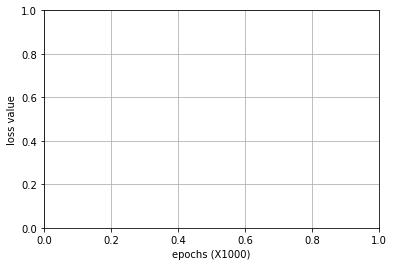

In [19]:



plt.xlabel('epochs (X1000)')
plt.ylabel("loss value")
plt.grid()

plt.plot(error_val)

plt.show()

In [8]:
ex_data_01 = np.array([4, 4, 4, 4])    #  4 - 4 + 4 - 4 = 0

print("predicted value = ", predict(ex_data_01) ) 

predicted value =  [-1.68596503e-11]


In [9]:
ex_data_02 = np.array([-3, 0, 9, -1])    #  -3 -0 +9 -(-1) = 7

print("predicted value = ", predict(ex_data_02) ) 

predicted value =  [7.]


In [10]:
ex_data_03 = np.array([-7, -9, -2, 8])   # -7 -(-9) + (-2) -8 = -8

print("predicted value = ", predict(ex_data_03) ) 

predicted value =  [-8.]


In [11]:
ex_data_04 = np.array([1, -2, 3, -2])   # 1 -(-2) + 3 -(-2) = 8

print("predicted value = ", predict(ex_data_04) ) 

predicted value =  [8.]


In [12]:
ex_data_05 = np.array([19, -12, 0, -76])   # 19 -(-12) + 0 -(-76) = 107

print("predicted value = ", predict(ex_data_05) ) 

predicted value =  [107.]


In [13]:
ex_data_06 = np.array([2001, -1, 109, 31])   # 2001 -(-1) + 109 -(31) = 2080

print("predicted value = ", predict(ex_data_06) ) 

predicted value =  [2079.99999996]


In [14]:
ex_data_07 = np.array([-1, 102, -200 , 1000])   # -1 -(102) + (-200) -(1000) = -1303

print("predicted value = ", predict(ex_data_07) ) 

predicted value =  [-1303.00000001]
